In [33]:
import pandas as pd
import numpy as np
import requests

In [2]:
url = "https://worldpopulationreview.com/world-cities" 
soup = requests.get(url).text

In [16]:
string_soup = str(soup)
count_string_soup = string_soup.count("country\":\"")
print(count_string_soup)
    

781


In [55]:
population = []
city = []
index = 0
for i in range(count_string_soup):
    search_start = string_soup.find("pop2023\":", index)
    search_end = string_soup.find(",\"", search_start)
    
    search_start_2 = string_soup.find("city\":\"", search_end)
    search_end_2 = string_soup.find("\",\"", search_start_2)
    
    population_count = string_soup[search_start + 9:search_end]
    city_name = string_soup[search_start_2 + 7:search_end_2]
    
    index = search_end
    
    population.append(population_count)
    city.append(city_name)

array = np.stack((city, population), axis = 1)

df_population = pd.DataFrame(array, columns = ['city', 'population'])
df_population

,city,population
0,Tokyo,37194104
1,Delhi,32941308
2,Shanghai,29210808
3,Dhaka,23209616
4,Sao Paulo,22619736
...,...,...
776,Tirupati,752744
777,Wuzhou,751679
778,Denver,750130
779,Yuxi,750102


In [49]:
population = []
index = 0
for i in range(count_string_soup):
    search_start = string_soup.find("pop2023\":", index)
    search_end = string_soup.find(",\"", search_start)
    
    population_count = string_soup[search_start + 9:search_end]
    
    index = search_end
    
    population.append(population_count)
    

country = []
index = 0
for i in range(count_string_soup):
    search_start = string_soup.find("country\":\"", index)
    search_end = string_soup.find("\",\"", search_start)
    
    country_name = string_soup[search_start + 10:search_end]
    
    index = search_end
    
    country.append(country_name)
    
city = []
index = 0
for i in range(count_string_soup):
    search_start = string_soup.find("city\":\"", index)
    search_end = string_soup.find("\",\"", search_start)
    
    city_name = string_soup[search_start + 7:search_end]
    
    index = search_end
    
    city.append(city_name)


In [38]:
array = np.stack((country, city, population), axis = 1)
array


array([['Japan', 'Tokyo', '37194104'],
       ['India', 'Delhi', '32941308'],
       ['China', 'Shanghai', '29210808'],
       ...,
       ['United States', 'Denver', '750130'],
       ['China', 'Yuxi', '750102'],
       ['China', 'Suining Sichuan', '750097']], dtype='<U24')

In [40]:
df_population = pd.DataFrame(array, columns = ['country', 'city', 'population'])
df_population

,country,city,population
0,Japan,Tokyo,37194104
1,India,Delhi,32941308
2,China,Shanghai,29210808
3,Bangladesh,Dhaka,23209616
4,Brazil,Sao Paulo,22619736
...,...,...,...
776,India,Tirupati,752744
777,China,Wuzhou,751679
778,United States,Denver,750130
779,China,Yuxi,750102


In [43]:
hotels = pd.read_csv('data/hotels_v2.csv')
hotels.head()

,Unnamed: 0,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,...,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score,hotel_country,hotel_city
0,0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102,0,0.0,Italy,Milan
1,1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,...,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443,0,0.0,Netherlands,Amsterdam
2,2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,...,5,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520,0,0.0,Spain,Barcelona
3,3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,...,27,9,"[' Leisure trip ', ' Couple ', ' Ambassador Ju...",656 day,45.479888,9.196298,0,0.0,Italy,Milan
4,4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,...,7,2,"[' Business trip ', ' Solo traveler ', ' Class...",444 day,52.370545,4.888644,0,0.0,Netherlands,Amsterdam


In [45]:
df_merged = pd.merge(hotels, df_population, left_on='hotel_city', right_on='city', how='left')
df_merged

,Unnamed: 0,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,...,days_since_review,lat,lng,sample,reviewer_score,hotel_country,hotel_city,country,city,population
0,0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,...,13 days,45.533137,9.171102,0,0.0,Italy,Milan,Italy,Milan,3154570
1,1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,...,234 day,52.385649,4.834443,0,0.0,Netherlands,Amsterdam,Netherlands,Amsterdam,1174025
2,2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,...,616 day,41.393192,2.161520,0,0.0,Spain,Barcelona,Spain,Barcelona,5687356
3,3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,...,656 day,45.479888,9.196298,0,0.0,Italy,Milan,Italy,Milan,3154570
4,4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,...,444 day,52.370545,4.888644,0,0.0,Netherlands,Amsterdam,Netherlands,Amsterdam,1174025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,515733,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,Hotel Moonlight,France,No Negative,0,617,...,106 day,51.494028,-0.191050,1,8.8,United Kingdom,London,United Kingdom,London,9648110
515734,515734,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,...,171 day,48.192379,16.399451,1,9.2,Austria,Vienna,Austria,Vienna,1975271
515735,515735,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,...,543 day,51.520795,-0.131084,1,8.3,United Kingdom,London,United Kingdom,London,9648110
515736,515736,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,...,74 days,51.515125,-0.160066,1,9.2,United Kingdom,London,United Kingdom,London,9648110


<AxesSubplot: >

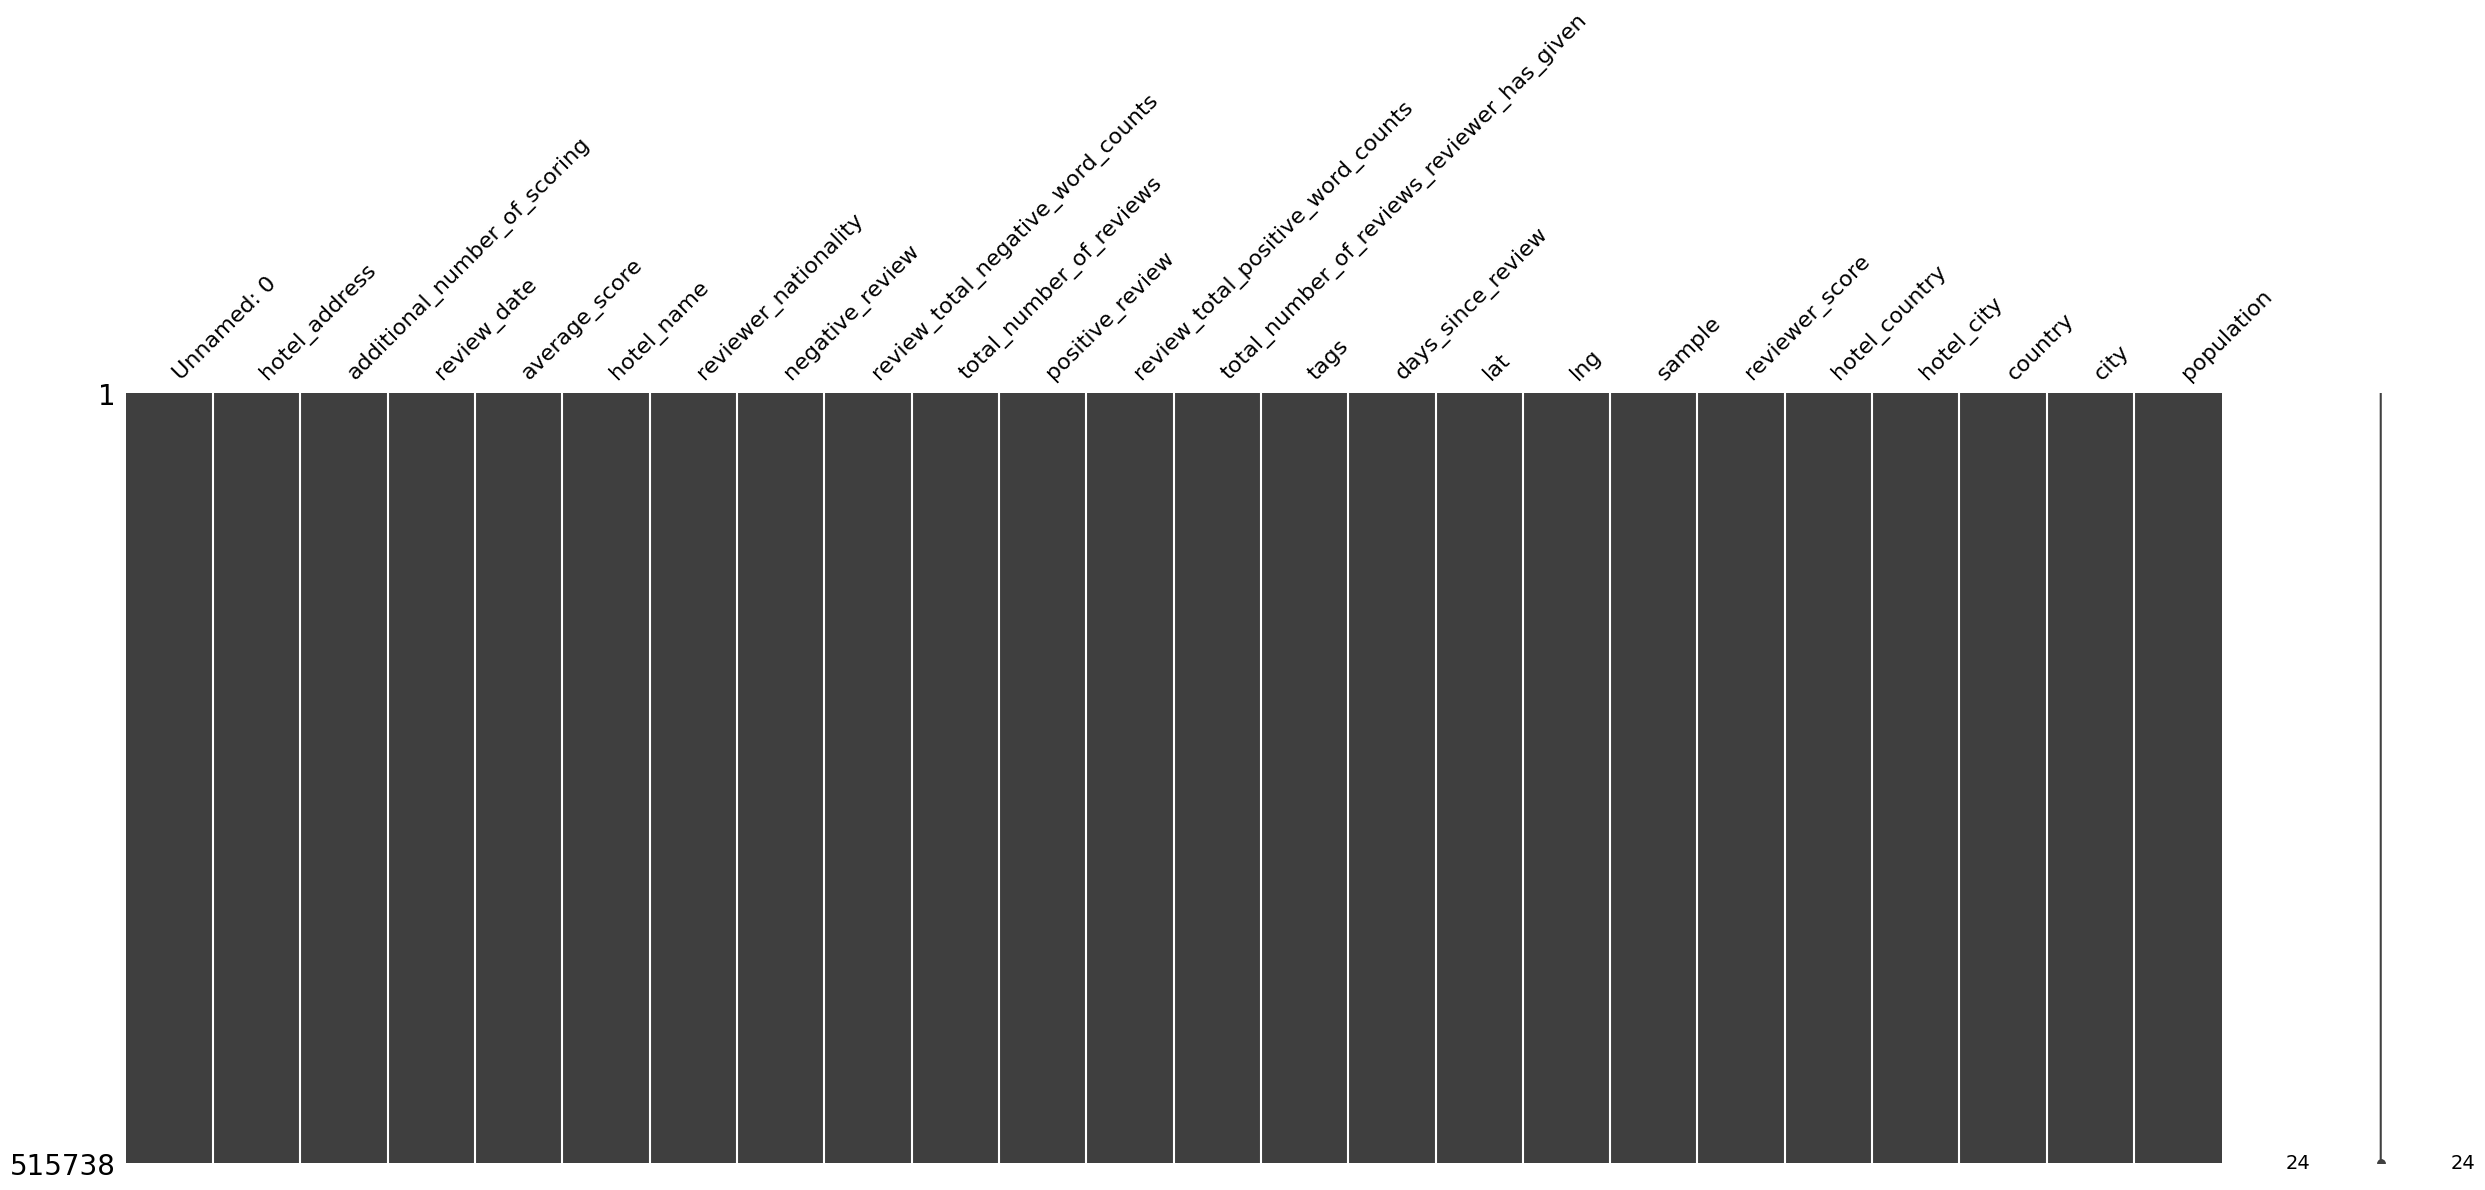

In [47]:
import missingno
# Plot graphic of missing values
missingno.matrix(df_merged, figsize = (30,10))